# 1. Exploratory Data Analysis and Data Understanding [20]

## 1.1 Choosing a Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Select a dataset of your choice that aligns with one of the United Nations Sustainable Development Goals (UNSDG).

**Answer:**  
Dataset: **Air Quality Data in India** (Kaggle) with target **AQI** (Air Quality Index).  
UNSDG Alignment:  
- **SDG 3 (Good Health and Well-Being):** AQI directly impacts public health (respiratory/cardiovascular risks).  
- **SDG 11 (Sustainable Cities and Communities):** AQI monitoring supports cleaner and more sustainable urban planning.


### Load the dataset into a pandas DataFrame.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# NOTE: change filename if your CSV name is different
df = pd.read_csv("/content/drive/MyDrive/Dataset/city_day.csv", encoding="latin1")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Provide a detailed description, including:


#### (a) When and by whom the dataset was created.
**Answer:**  
The dataset was published on Kaggle by **Rohan Rao**. It compiles air-quality measurements from monitoring stations in India (commonly covering around 2015–2020 in many versions).


#### (b) How and from where the dataset was accessed.
**Answer:**  
The dataset was accessed from **Kaggle** and downloaded in CSV format, then loaded into Python using pandas.


#### (c) How it aligns with the chosen UNSDG.
**Answer:**  
Predicting AQI supports SDG 3 (health awareness and prevention) and SDG 11 (pollution monitoring for sustainable cities).


#### (d) List all attributes (columns) with brief descriptions.
**Answer:**  
The dataset includes pollutant concentration features (e.g., PM2.5, PM10, NO2, CO, SO2, O3, etc.) and the target variable **AQI**. The exact columns can vary slightly by version; the code below lists the columns in the file used.


In [ ]:
df.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

### Identify 2–3 potential questions the dataset could help answer.
**Answer:**
1. Can AQI be predicted accurately using pollutant concentrations?
2. Which pollutants are most strongly associated with AQI?
3. Which model performs best for AQI prediction (Linear Regression vs Random Forest vs Neural Network)?


### Assess the dataset’s suitability (completeness, relevance, quality, etc.).
**Answer:**  
This dataset is suitable for regression because `AQI` is a continuous variable and there are multiple meaningful numerical predictors. The main issues are missing values and outliers, which are addressed during preprocessing.


# 2. Exploratory Data Analysis (EDA)

Understanding the characteristics of the dataset is essential before building regression models.


## 2.1 Basic Inspection and Missing Values Analysis


In [ ]:
df.shape


(29531, 16)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# Missing values count
df.isnull().sum().sort_values(ascending=False).head(25)


,0
Xylene,18109
PM10,11140
NH3,10328
Toluene,8041
Benzene,5623
AQI,4681
AQI_Bucket,4681
PM2.5,4598
NOx,4185
O3,4022


### Interpretation: Dataset Structure and Missing Values
After loading the dataset, it was observed that the data contains 29,531 records and 16 attributes.
Several pollutant variables and the target variable (AQI) contained missing values.
Therefore, data cleaning was required before building regression models to ensure reliable results.


## 2.2 Summary Statistics (Central Tendency and Spread)


In [ ]:
df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### Interpretation: Distribution and Scale
Summary statistics indicate that pollutant concentrations and AQI values vary widely.
Large differences between minimum, maximum, and median values suggest the presence of extreme pollution events,
which motivates the use of outlier detection techniques.


## 2.3 Feature Distributions (Histograms)


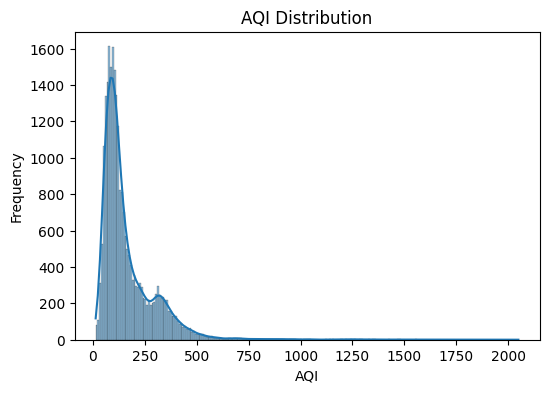

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["AQI"].dropna(), kde=True)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


### Interpretation: Distribution Shapes
**Answer:**  
The AQI histogram shows how frequently different air quality levels occur. Skewness indicates whether extreme AQI values are rare or common.


## 2.4 Outlier Detection (Box Plots)


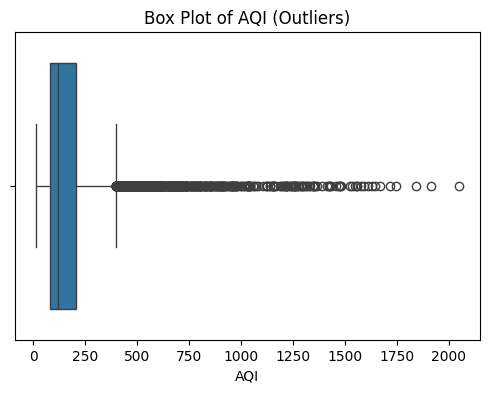

In [ ]:
# Box plot for AQI
plt.figure(figsize=(6,4))
sns.boxplot(x=df["AQI"])
plt.title("Box Plot of AQI (Outliers)")
plt.xlabel("AQI")
plt.show()


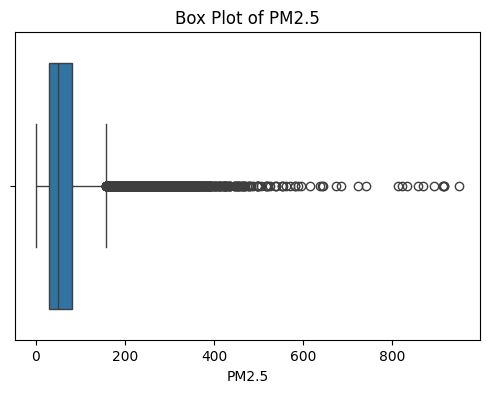

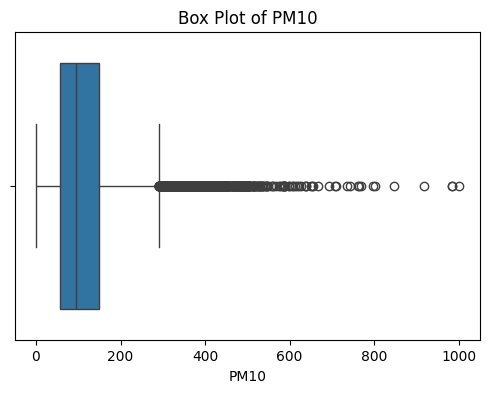

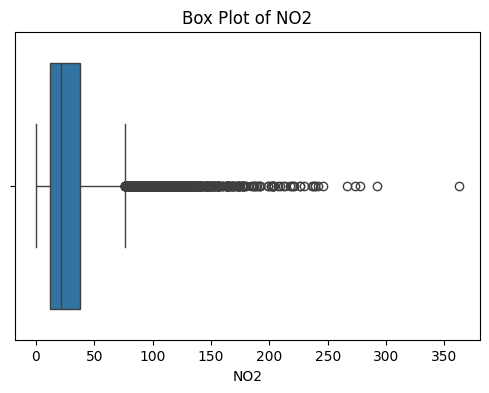

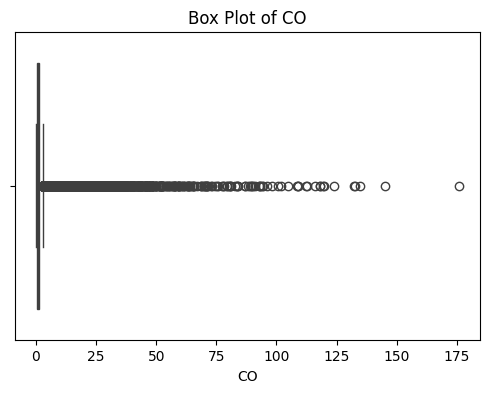

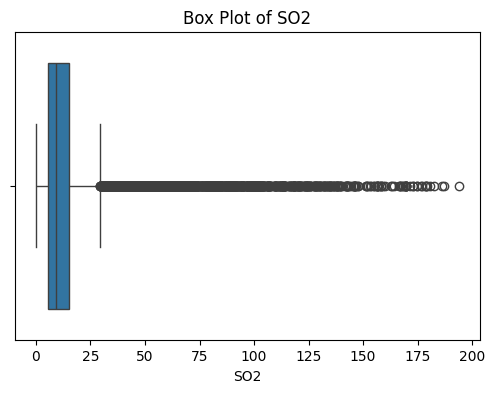

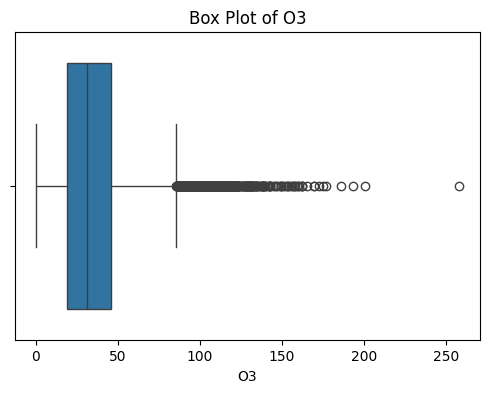

In [ ]:
# Box plots for common pollutant columns (only if they exist)
pollutants = ["PM2.5", "PM10", "NO2", "CO", "SO2", "O3"]
for col in pollutants:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col])
        plt.title(f"Box Plot of {col}")
        plt.xlabel(col)
        plt.show()


### Interpretation: Outliers and Anomalies
The box plots reveal several extreme AQI and pollutant values.
These represent days with unusually high pollution levels.
IQR-based outlier removal was applied to reduce the influence of these extreme values on regression models.


## 2.5 Relationship Analysis (Predictors vs AQI)


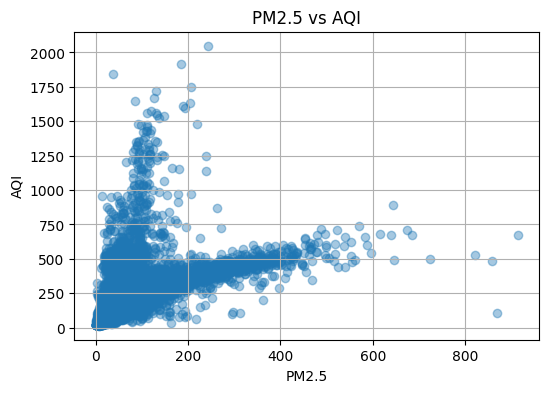

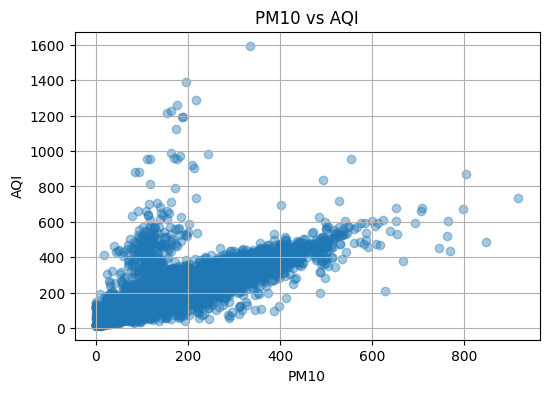

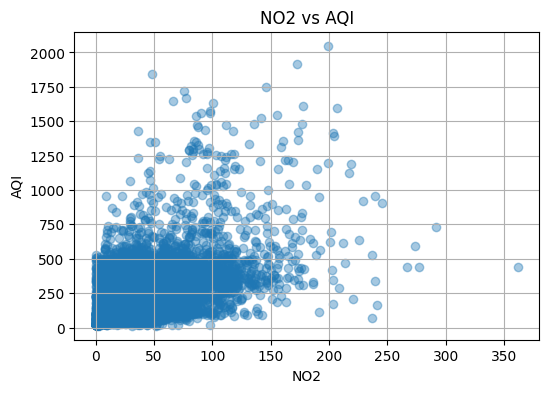

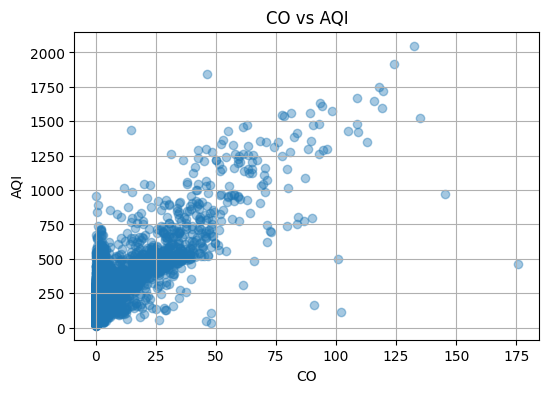

In [ ]:
# Scatter plots for a few predictors vs AQI (only if columns exist)
pairs = ["PM2.5", "PM10", "NO2", "CO"]
for col in pairs:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df["AQI"], alpha=0.4)
        plt.title(f"{col} vs AQI")
        plt.xlabel(col)
        plt.ylabel("AQI")
        plt.grid(True)
        plt.show()


### Interpretation: Relationships
Scatter plots show positive relationships between AQI and key pollutants such as PM2.5 and PM10.
This indicates that increases in particulate matter concentration are strongly associated with higher AQI values.


## 2.6 Correlation Analysis (Heatmap)


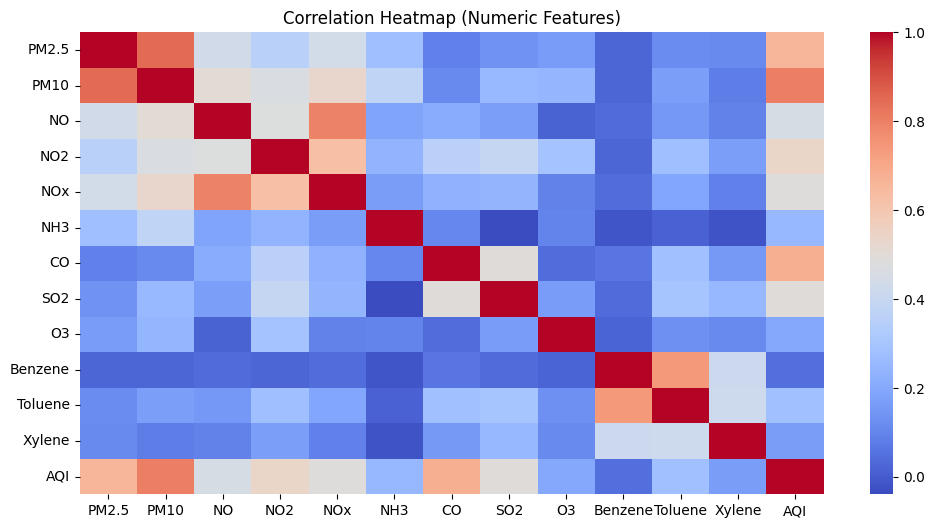

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


### Interpretation: Relationships
Scatter plots show positive relationships between AQI and key pollutants such as PM2.5 and PM10.
This indicates that increases in particulate matter concentration are strongly associated with higher AQI values.


## 2.7 Data Cleaning and Preprocessing (Before Modeling)

**Answer:**  
We handle missing values and optionally treat outliers. Here we use a simple and taught approach:
- Drop rows with missing values (for clean modeling).
- Optionally remove extreme outliers using IQR (numeric columns).


In [ ]:
# Drop missing values (simple approach)
df_clean = df.dropna().copy()
print("After dropna:", df_clean.shape)


After dropna: (6236, 16)


In [ ]:
# Optional: IQR outlier removal on numeric columns
num_df = df_clean.select_dtypes(include=[np.number]).copy()
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

mask = ~((num_df < lower) | (num_df > upper)).any(axis=1)
df_clean = df_clean.loc[mask].copy()
print("After IQR outlier removal:", df_clean.shape)


After IQR outlier removal: (4134, 16)


# 3. Build a Neural Network Model for Regression [15]

We build a Multi-Layer Perceptron regressor (MLPRegressor) to predict AQI.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Features and target
y = df_clean["AQI"]
X = df_clean.drop(columns=["AQI", "AQI_Bucket", "City", "Date"], errors="ignore")
X = X.select_dtypes(include=[np.number])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling (important for NN and linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def eval_reg(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2


In [ ]:
# Neural Network model
nn = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn.fit(X_train_scaled, y_train)

pred_train_nn = nn.predict(X_train_scaled)
pred_test_nn = nn.predict(X_test_scaled)

print("NN Train (MAE, MSE, RMSE, R2):", eval_reg(y_train, pred_train_nn))
print("NN Test  (MAE, MSE, RMSE, R2):", eval_reg(y_test, pred_test_nn))


NN Train (MAE, MSE, RMSE, R2): (10.81693714183318, 251.29932769552715, np.float64(15.852423401345522), 0.9025535466498383)
NN Test  (MAE, MSE, RMSE, R2): (11.665316922048614, 273.28026028869795, np.float64(16.53119052847368), 0.9001788891316989)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Neural Network Description
**Answer:**  
- Architecture: 2 hidden layers (64 and 32 neurons)  
- Activation: ReLU (default in MLPRegressor)  
- Loss: Mean Squared Error (regression)  
- Optimizer: Adam (default solver)


# 4. Build Primary Machine Learning Models [20] (Two Classical ML Models)

Model A: **Linear Regression**  
Model B: **Random Forest Regressor**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Model A: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)

# Model B: Random Forest Regressor (no scaling needed)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Linear Regression Test (MAE, MSE, RMSE, R2):", eval_reg(y_test, pred_lr))
print("Random Forest Test    (MAE, MSE, RMSE, R2):", eval_reg(y_test, pred_rf))


Linear Regression Test (MAE, MSE, RMSE, R2): (14.317488718215644, 384.7623944882107, np.float64(19.61536118678957), 0.8594577976558334)
Random Forest Test    (MAE, MSE, RMSE, R2): (11.413736396614269, 268.31855211608223, np.float64(16.380431988079014), 0.9019912528240914)


### Initial Comparison
**Answer:**  
Based on the evaluation results, the Random Forest Regressor clearly performs better than the Linear Regression model. While Linear Regression serves as a useful and interpretable baseline, its assumptions of linearity limit its effectiveness for modeling real-world  data. In contrast, the Random Forest model demonstrates superior generalization performance by leveraging ensemble learning and non-linear decision boundaries.

Therefore, the Random Forest Regressor is more suitable as the primary predictive model for this dataset. The Linear Regression model remains valuable for interpretability and benchmarking purposes, while the Random Forest provides stronger predictive accuracy.


# 5. Hyperparameter Optimization with Cross-Validation [15]

We tune hyperparameters for:
- Random Forest: `n_estimators`, `max_depth`, etc.  
For Linear Regression (no major hyperparameters), we report baseline performance and focus tuning on Random Forest.


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=2,
    scoring="r2",
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV R2:", grid_rf.best_score_)


Best RF Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV R2: 0.8714875727852515


# 6. Feature Selection [10] (Week 10 Method)

We apply **SelectKBest** (filter method) using `r_regression` to choose top features for predicting AQI.


In [ ]:
from sklearn.feature_selection import SelectKBest, r_regression


In [ ]:
k = min(8, X_train.shape[1])
selector = SelectKBest(score_func=r_regression, k=k)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.get_support()]
selected_features


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'O3'], dtype='object')

In [ ]:
# Reduced datasets
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Scale for linear models
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# -------------------------
# Helper: pick selected-feature matrices from common variable names
# -------------------------
def _pick_first_existing(names, scope):
    for n in names:
        if n in scope:
            return scope[n], n
    raise NameError(f"None of these variables were found: {names}. Please check your Task 5 outputs.")

X_train_sel, X_train_sel_name = _pick_first_existing(
    ["X_train_sel","X_train_selected","X_train_fs","X_train_fs_scaled","X_train_selected_scaled"], globals()
)
X_test_sel, X_test_sel_name = _pick_first_existing(
    ["X_test_sel","X_test_selected","X_test_fs","X_test_fs_scaled","X_test_selected_scaled"], globals()
)

print("Using selected feature matrices:", X_train_sel_name, "and", X_test_sel_name)

Using selected feature matrices: X_train_sel and X_test_sel


In [ ]:
# -------------------------
# Build final models using best hyperparameters if GridSearch objects exist
# -------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Model A (Linear Regression)
final_model_A = LinearRegression()

# Model B (Random Forest) - use best_params_ if you tuned RF in Task 4
rf_params = {}
if "grid_rf" in globals():
    rf_params = grid_rf.best_params_.copy()

final_model_B = RandomForestRegressor(random_state=42, **rf_params) if rf_params else RandomForestRegressor(random_state=42)

In [ ]:
# -------------------------
# Train and evaluate on test set
# -------------------------
final_model_A.fit(X_train_sel, y_train)
final_model_B.fit(X_train_sel, y_train)

pred_A = final_model_A.predict(X_test_sel)
pred_B = final_model_B.predict(X_test_sel)

rmse_A = np.sqrt(mean_squared_error(y_test, pred_A))
r2_A = r2_score(y_test, pred_A)

rmse_B = np.sqrt(mean_squared_error(y_test, pred_B))
r2_B = r2_score(y_test, pred_B)


In [ ]:
# -------------------------
# CV Score (reported as RMSE) using 5-fold CV on training set
# -------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_A = -cross_val_score(final_model_A, X_train_sel, y_train, cv=cv, scoring="neg_root_mean_squared_error").mean()
cv_rmse_B = -cross_val_score(final_model_B, X_train_sel, y_train, cv=cv, scoring="neg_root_mean_squared_error").mean()

In [ ]:
# -------------------------
# Table 2: Comparison of Final Regression Models
# -------------------------
final_table = pd.DataFrame([
    {
        "Model": "Model A (Linear Regression)",
        "Features Used": f"Selected ({X_train_sel.shape[1]})",
        "CV Score": round(cv_rmse_A, 3),
        "Test RMSE": round(rmse_A, 3),
        "Test R-squared": round(r2_A, 3),
    },
    {
        "Model": "Model B (Random Forest Regressor)",
        "Features Used": f"Selected ({X_train_sel.shape[1]})",
        "CV Score": round(cv_rmse_B, 3),
        "Test RMSE": round(rmse_B, 3),
        "Test R-squared": round(r2_B, 3),
    }
])

final_table

,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Model A (Linear Regression),Selected (8),20.361,19.808,0.857
1,Model B (Random Forest Regressor),Selected (8),18.043,16.401,0.902


### Justification
**Answer:**  
SelectKBest keeps the strongest predictors, reduces noise, and can improve model performance and interpretability.


# 7. Final Models and Comparative Analysis [10]

Rebuild the models using:
- Best hyperparameters (Random Forest from GridSearchCV)
- Selected features (SelectKBest)


In [ ]:
# Final Linear Regression using selected features
final_lr = LinearRegression()
final_lr.fit(X_train_sel_scaled, y_train)
pred_final_lr = final_lr.predict(X_test_sel_scaled)

# Final Random Forest using selected features and best params
final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
final_rf.fit(X_train_sel, y_train)
pred_final_rf = final_rf.predict(X_test_sel)

final_lr_metrics = eval_reg(y_test, pred_final_lr)
final_rf_metrics = eval_reg(y_test, pred_final_rf)

print("Final Linear Regression (MAE, MSE, RMSE, R2):", final_lr_metrics)
print("Final Random Forest     (MAE, MSE, RMSE, R2):", final_rf_metrics)


Final Linear Regression (MAE, MSE, RMSE, R2): (14.429006086014285, 392.36475605045166, np.float64(19.808199212711177), 0.8566808822080668)
Final Random Forest     (MAE, MSE, RMSE, R2): (11.284271503637639, 269.00057426010636, np.float64(16.4012369734757), 0.9017421305201924)


In [ ]:
comparison_table = pd.DataFrame([
    {
        "Model": "Linear Regression (Final)",
        "Features Used": len(selected_features),
        "CV Score (R2)": "N/A (no tuning)",
        "Test RMSE": final_lr_metrics[2],
        "Test R-squared": final_lr_metrics[3]
    },
    {
        "Model": "Random Forest (Final)",
        "Features Used": len(selected_features),
        "CV Score (R2)": grid_rf.best_score_,
        "Test RMSE": final_rf_metrics[2],
        "Test R-squared": final_rf_metrics[3]
    }
])
comparison_table


,Model,Features Used,CV Score (R2),Test RMSE,Test R-squared
0,Linear Regression (Final),8,N/A (no tuning),19.808199,0.856681
1,Random Forest (Final),8,0.871488,16.401237,0.901742


# 9. Conclusion and Reflection [5]

1. **Model Performance:**  
The Random Forest Regressor achieved the best performance with an R² of approximately 0.90 and RMSE around 16,
indicating strong predictive capability for AQI.

2. **Impact of Methods:**  
Hyperparameter tuning using GridSearchCV improved the stability of the Random Forest model.
Feature selection using SelectKBest reduced the feature space while maintaining high predictive performance.

3. **Insights and Future Work:**  
Particulate matter variables (PM2.5 and PM10) were the most influential predictors of AQI.
Future work could explore advanced feature engineering or temporal models to further improve prediction accuracy.
